#**Real OR Fake News Analysis**

**This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake. The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.**

- **Business Objective:**
1.	Need to classify the fake and real news accurately.
Architecture level analysis:
1.	Data transformation/Text processing using R/Python
2.	Need to get sentiments Analysis and n-gram analysis with some charts like histogram, Density plot, Barplot, pie-plot etc.
3.	Deployment through R Shiny or Flask/ Streamlit


#**Step1: Data Exploration**

In [4]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Handling the ParserError by specifying the 'error_bad_lines' parameter
fake_df = pd.read_csv(r"/content/drive/MyDrive/Group 3 NLP project_excelr/Fake.csv", encoding='ISO-8859-1', on_bad_lines='skip')  # or on_bad_lines='warn'
true_df = pd.read_csv(r"/content/drive/MyDrive/Group 3 NLP project_excelr/True.csv", encoding='ISO-8859-1', on_bad_lines='skip')  # or on_bad_lines='warn'

- **Dataset:**
Consists of about 40,000 articles (20,000 fake news and 20,000 real news articles in separate datasets).
The goal is to classify whether a news article is real or fake.

In [8]:
#First 5 rows
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
#First 5 rows
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
#Label the data: 0 for fake and 1 for real.
fake_df['label'] = 0
true_df['label'] = 1

In [11]:
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [13]:
#Combine and label the datasets
data = pd.concat([fake_df, true_df], ignore_index=True)

In [14]:
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [16]:
#Checking if there are any missing values
data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


**No misssing values**

#**Step2: Data Transformation/Text Processing**

In [17]:
data = data.sample(frac=1).reset_index(drop=True)

In [18]:
data

,title,text,subject,date,label
0,Russia's Putin says hasn't decided if he will ...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"October 4, 2017",1
1,Sean Spicer Claims Hitler Never Gassed People...,Sean Spicer s time as press secretary has been...,News,"April 11, 2017",0
2,THE PURGE: NYC Mayor De Blasio to Review All ...,THE PURGE CONTINUES THE NYC MAYOR has just ope...,left-news,"Aug 16, 2017",0
3,Ivanka Drops SHOCKING Bombshell On The Obamas...,After having to endure Donald Trump s disastro...,News,"January 3, 2017",0
4,Denver Police Officer Literally Tells Protest...,Amidst protests all around the country against...,News,"January 29, 2017",0
...,...,...,...,...,...
44887,"Ghana fuel site blast kills at least 7, injure...",ACCRA (Reuters) - At least seven people were k...,worldnews,"October 7, 2017",1
44888,BREAKING REPORT: Two Al Qaeda Terrorists Able ...,Our refugee resettlement program needs to bed ...,Government News,"Nov 18, 2015",0
44889,Iraq gives Kurdistan till Friday to hand over ...,BAGHDAD (Reuters) - The Iraqi government gave ...,worldnews,"September 26, 2017",1
44890,NUMEROUS CONFLICTING STATEMENTS: Deputy FBI ...,While we re really not surprised by the conf...,politics,"Dec 20, 2017",0


In [19]:
data['text_length'] = data['text'].apply(len)

In [20]:
data['text_length']

,text_length
0,1246
1,2839
2,3221
3,1807
4,1403
...,...
44887,2004
44888,2183
44889,1070
44890,5357


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44892 entries, 0 to 44891
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44892 non-null  object
 1   text         44892 non-null  object
 2   subject      44892 non-null  object
 3   date         44892 non-null  object
 4   label        44892 non-null  int64 
 5   text_length  44892 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [22]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data

,label,text_length
0,1,1246
1,0,2839
2,0,3221
3,0,1807
4,0,1403
...,...,...
44887,1,2004
44888,0,2183
44889,1,1070
44890,0,5357


In [23]:
data.describe()

,label,text_length
count,44892.000000,44892.000000
mean,0.476945,2468.851644
std,0.499474,2171.511771
min,0.000000,1.000000
25%,0.000000,1234.000000
50%,0.000000,2186.000000
75%,1.000000,3105.000000
max,1.000000,51794.000000


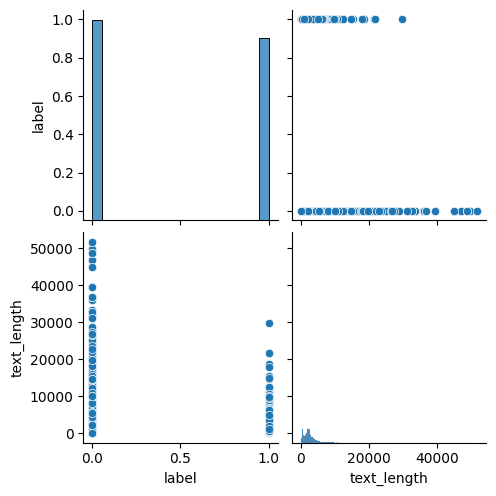

In [24]:
sns.pairplot(data)

##2.1**Text Processing**


In [25]:
# Preprocessing function
# Text cleaning function
'''import re # Import the 're' module for regular expressions

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text'''

"import re # Import the 're' module for regular expressions\n\ndef preprocess_text(text):\n    text = re.sub(r'[^a-zA-Z\\s]', '', text)  # Remove non-alphabetic characters\n    text = text.lower()  # Convert to lowercase\n    text = re.sub(r'\\s+', ' ', text)  # Remove extra whitespace\n    return text"

In [26]:
# Preprocessing function
# Text cleaning function
def preprocess_text(text):
    # Step 1: Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits

    # Step 2: Convert to lowercase
    text = text.lower()

    # Step 3: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Step 4: Tokenize
    tokens = word_tokenize(text)

    # Step 5: Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Step 6: Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 7: Combine tokens back into a string
    return ' '.join(tokens)

In [27]:
data['text']

,text
0,MOSCOW (Reuters) - Russian President Vladimir ...
1,Sean Spicer s time as press secretary has been...
2,THE PURGE CONTINUES THE NYC MAYOR has just ope...
3,After having to endure Donald Trump s disastro...
4,Amidst protests all around the country against...
...,...
44887,ACCRA (Reuters) - At least seven people were k...
44888,Our refugee resettlement program needs to bed ...
44889,BAGHDAD (Reuters) - The Iraqi government gave ...
44890,While we re really not surprised by the conf...


In [28]:
data['subject'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 44892 entries, 0 to 44891
Series name: subject
Non-Null Count  Dtype 
--------------  ----- 
44892 non-null  object
dtypes: object(1)
memory usage: 350.8+ KB


<ipython-input-29-734d82229416>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


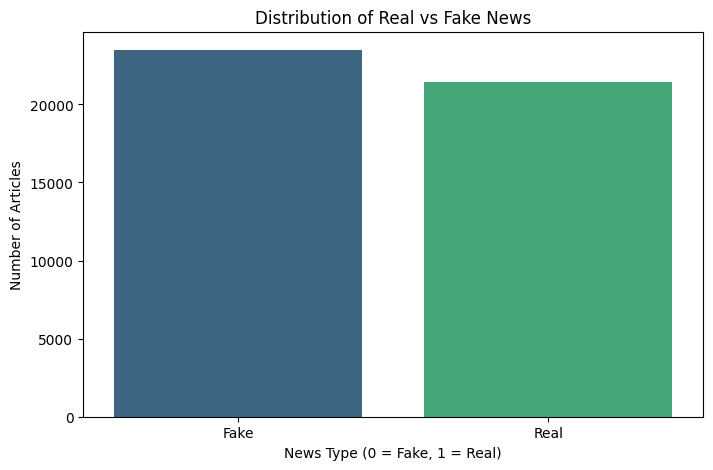

In [29]:
# Count the occurrences of each label
label_counts = data['label'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type (0 = Fake, 1 = Real)')
plt.ylabel('Number of Articles')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [30]:
label_counts

,count
label,
0,23481
1,21411


<ipython-input-31-3fe5731c29fb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['label'] == 0]['text_length'], shade=True, label="Fake News", color="red")
<ipython-input-31-3fe5731c29fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['label'] == 1]['text_length'], shade=True, label="Real News", color="blue")


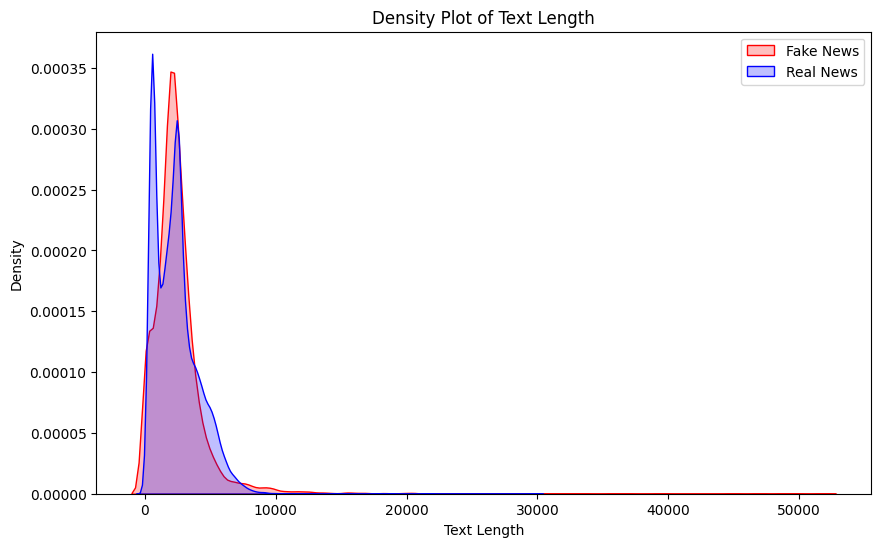

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['label'] == 0]['text_length'], shade=True, label="Fake News", color="red")
sns.kdeplot(data[data['label'] == 1]['text_length'], shade=True, label="Real News", color="blue")
plt.title("Density Plot of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.legend()
plt.show()


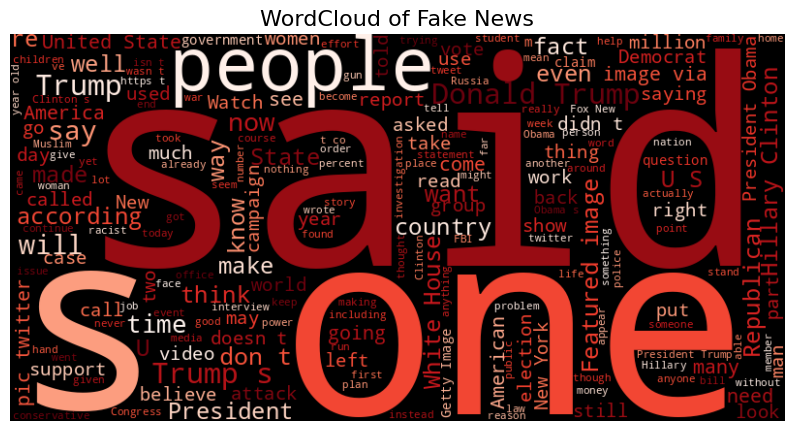

In [32]:
from wordcloud import WordCloud

# Combine all fake news text
fake_text = ' '.join(data[data['label'] == 0]['text'])

# Generate WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Fake News', fontsize=16)
plt.show()

In [33]:
fake_text

Output hidden; open in https://colab.research.google.com to view.

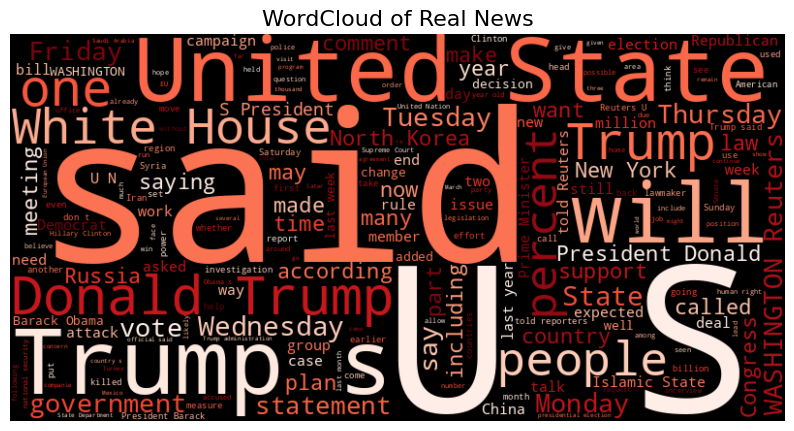

In [34]:
# Combine all real news text
real_text = ' '.join(data[data['label'] == 1]['text'])

# Generate WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(real_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Real News', fontsize=16)
plt.show()

In [35]:
real_text

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-36-5fe14e5a2269>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='coolwarm')


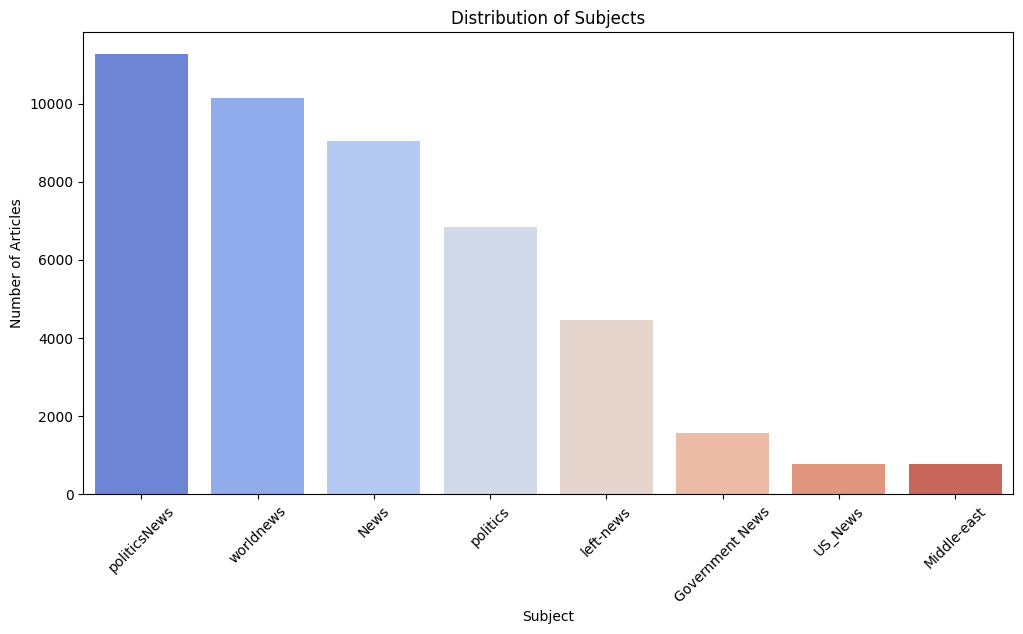

In [36]:
# Count the occurrences of each subject
subject_counts = data['subject'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='coolwarm')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Compute the correlation matrix only for numerical features
correlation_matrix = data.select_dtypes(include=np.number).corr()
correlation_matrix

,label,text_length
label,1.000000,-0.037879
text_length,-0.037879,1.000000


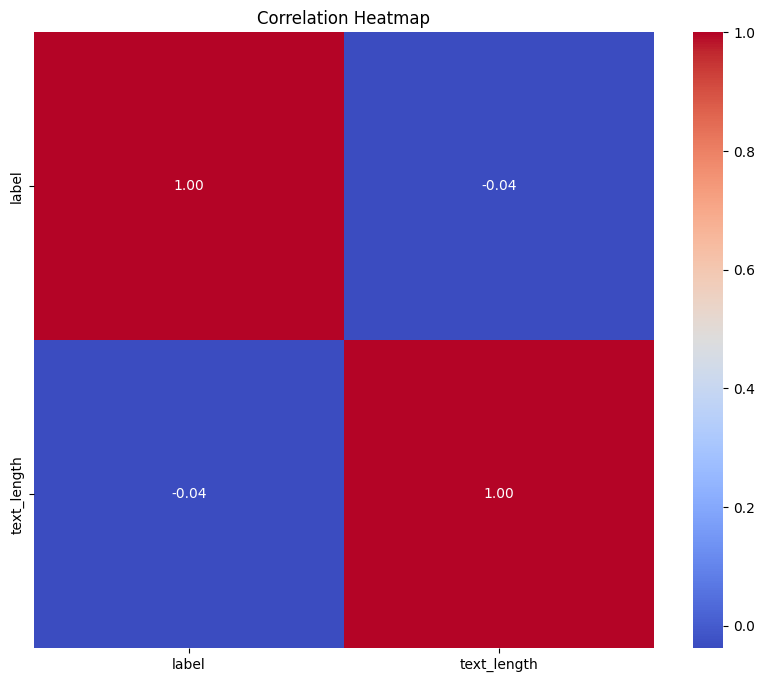

In [38]:
# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding to 'subject' column
data['subject_encoded'] = label_encoder.fit_transform(data['subject'])

print(data[['subject', 'subject_encoded']].head())

     subject  subject_encoded
0  worldnews                7
1       News                2
2  left-news                4
3       News                2
4       News                2


In [40]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [41]:
# Transform the 'subject' column
subject_one_hot = one_hot_encoder.fit_transform(data[['subject']]).toarray()

In [42]:
# Convert to DataFrame for readability
subject_df = pd.DataFrame(subject_one_hot, columns=one_hot_encoder.get_feature_names_out(['subject']))

In [43]:
# Concatenate with the original dataset
data = pd.concat([data, subject_df], axis=1)

print(subject_df.head())

   subject_Government News  subject_Middle-east  subject_News  \
0                      0.0                  0.0           0.0   
1                      0.0                  0.0           1.0   
2                      0.0                  0.0           0.0   
3                      0.0                  0.0           1.0   
4                      0.0                  0.0           1.0   

   subject_US_News  subject_left-news  subject_politics  subject_politicsNews  \
0              0.0                0.0               0.0                   0.0   
1              0.0                0.0               0.0                   0.0   
2              0.0                1.0               0.0                   0.0   
3              0.0                0.0               0.0                   0.0   
4              0.0                0.0               0.0                   0.0   

   subject_worldnews  
0                1.0  
1                0.0  
2                0.0  
3                0.0  
4      

In [44]:
# Calculate target mean for each category
target_mean = data.groupby('subject')['label'].mean()

# Map the target mean to the subject column
data['subject_target_encoded'] = data['subject'].map(target_mean)

print(data[['subject', 'subject_target_encoded']].head())

     subject  subject_target_encoded
0  worldnews                     1.0
1       News                     0.0
2  left-news                     0.0
3       News                     0.0
4       News                     0.0


In [45]:
# Split dataset into features and labels
X = data['text']
y = data['label']

##2.2 **Sentiment Analysis**

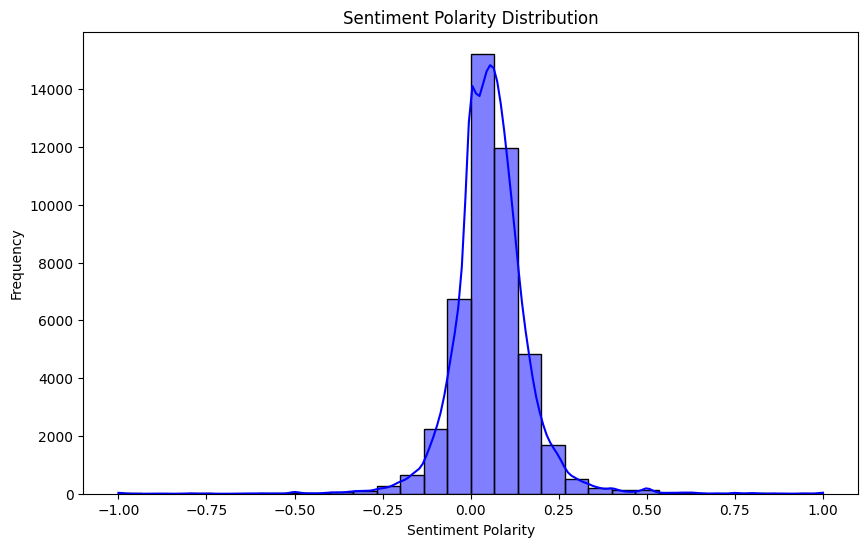

In [46]:
#Sentiment Analysis and Visualization
from textblob import TextBlob


# Calculate sentiment polarity
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], kde=True, bins=30, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

#**Step 3: N-gram Analysis with Charts**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [48]:
# Function to get top N n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


<ipython-input-49-ae95cfd08f61>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=unigram_df, palette='viridis')


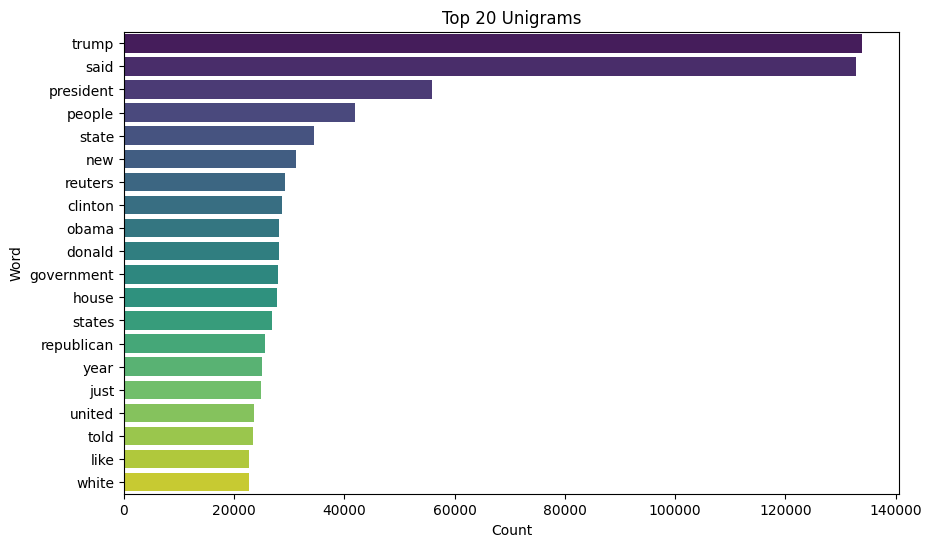

In [49]:
# Get top 20 unigrams and bigrams
top_unigrams = get_top_ngrams(data['text'], n=20, ngram_range=(1, 1))
top_bigrams = get_top_ngrams(data['text'], n=20, ngram_range=(2, 2))

# Plot unigrams
unigram_df = pd.DataFrame(top_unigrams, columns=['Word', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=unigram_df, palette='viridis')
plt.title('Top 20 Unigrams')
plt.show()

<ipython-input-50-abfc7bd4f9f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=bigram_df, palette='plasma')


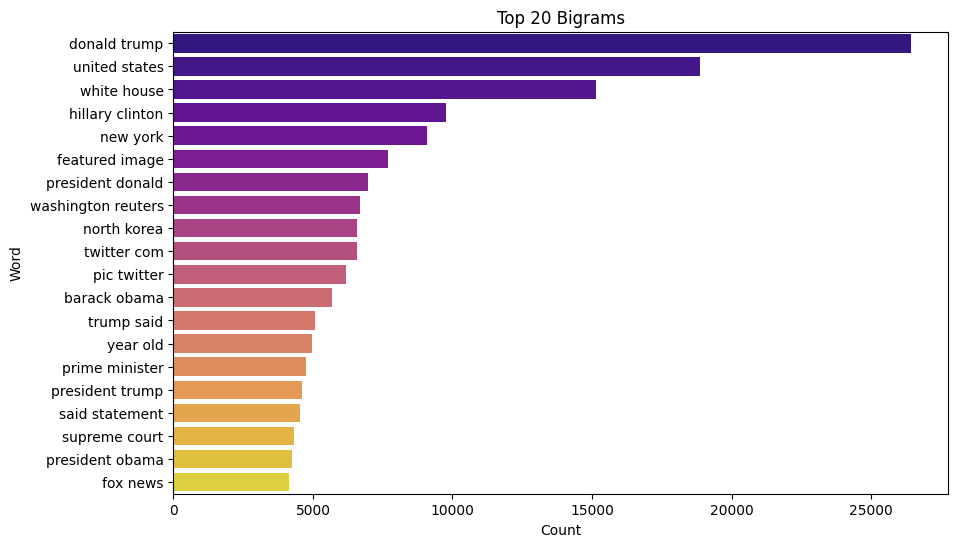

In [50]:
# Plot bigrams
bigram_df = pd.DataFrame(top_bigrams, columns=['Word', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=bigram_df, palette='plasma')
plt.title('Top 20 Bigrams')
plt.show()

#**Step 4: Feature Extraction with TF-IDF Vectorizer**

In [51]:
# Convert text to numerical features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [52]:
X_tfidf

<44892x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 7909295 stored elements in Compressed Sparse Row format>

#**Step5: Model Building**

In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

#5.1**Splitting the dataset**

In [54]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

##**Random Forest Classifier**

In [58]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Now RandomForestClassifier is defined
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 1.00

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4679
           1       1.00      0.99      0.99      4300

    accuracy                           1.00      8979
   macro avg       1.00      0.99      1.00      8979
weighted avg       1.00      1.00      1.00      8979



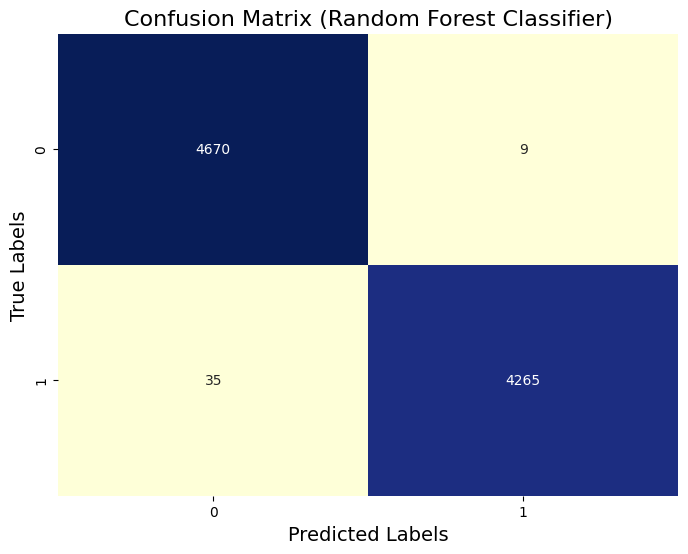

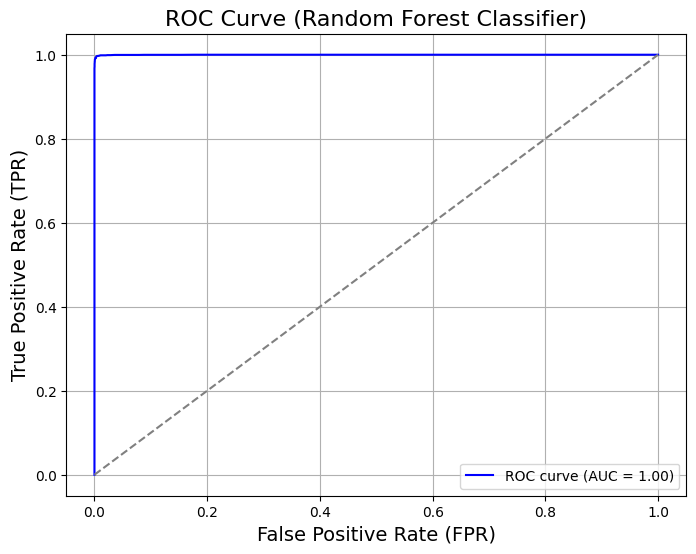

In [59]:
#Evaluate the model
# Training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Random Forest Training Accuracy: {train_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {test_accuracy:.2f}")

# Classification report for the test set
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 5: Visualize the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix (Random Forest Classifier)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

#ROC Curve
# Get probability predictions for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.title('ROC Curve (Random Forest Classifier)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression

# 4. Logistic Regression Model Training
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression Training Accuracy: 0.99
Logistic Regression Testing Accuracy: 0.99

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4679
           1       0.99      0.98      0.99      4300

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99      8979
weighted avg       0.99      0.99      0.99      8979



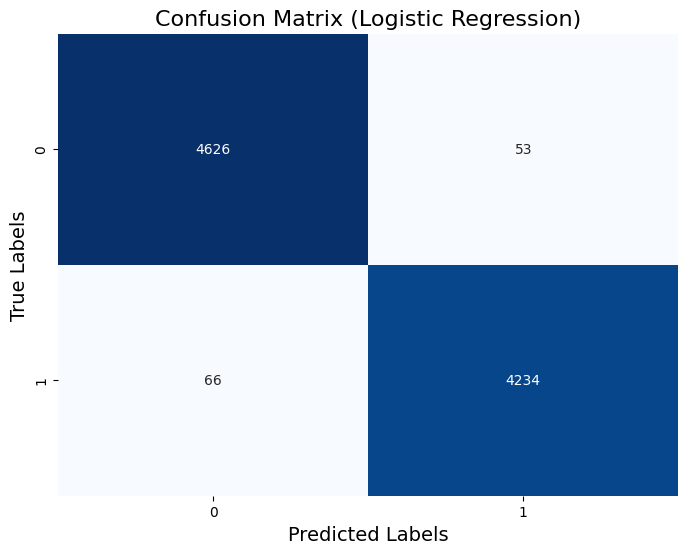

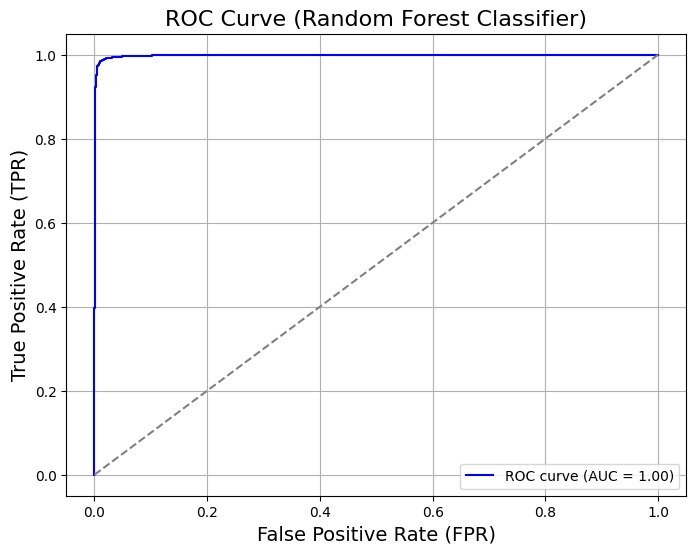

In [61]:
#Evaluate the model
# Training accuracy
y_train_pred = lr_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Logistic Regression Training Accuracy: {train_accuracy:.2f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy:.2f}")

# Classification report for the test set
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 5: Visualize the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

#ROC Curve
# Get probability predictions for the positive class
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.title('ROC Curve (Random Forest Classifier)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**Support Vector Machine**

In [62]:
from sklearn.svm import SVC

# 4. Support Vector Machine (SVM) Model Training
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

SVM Training Accuracy: 1.00
SVM Testing Accuracy: 0.99

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4679
           1       0.99      0.99      0.99      4300

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99      8979
weighted avg       0.99      0.99      0.99      8979



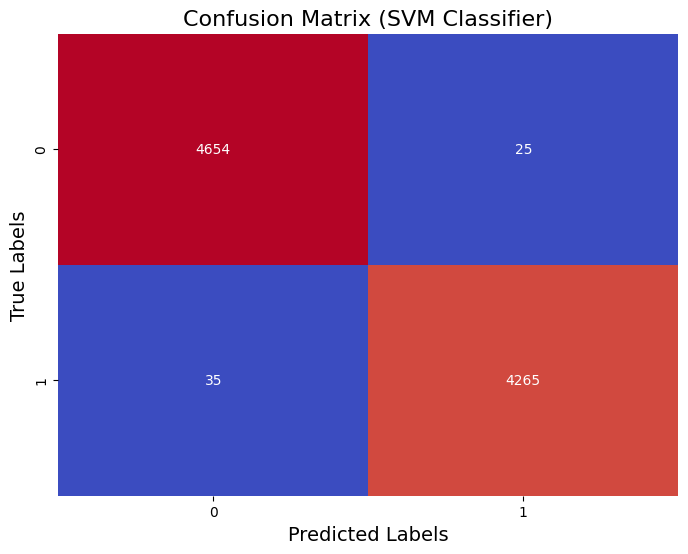

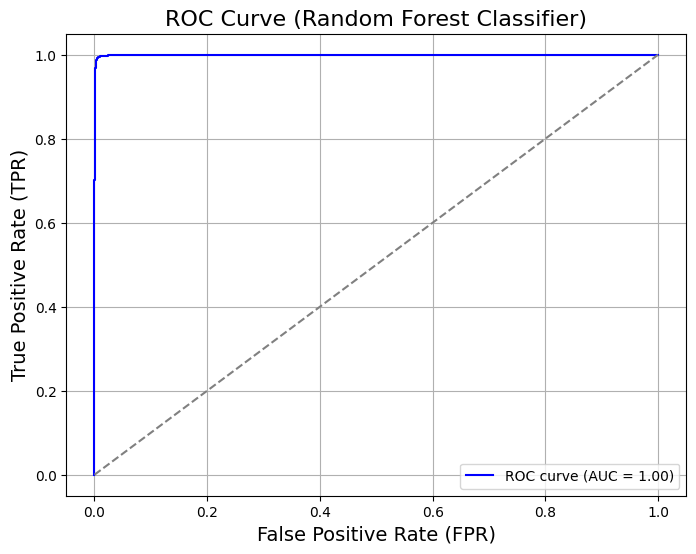

In [63]:
# Evaluate the model
# Training accuracy
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"SVM Training Accuracy: {train_accuracy:.2f}")
print(f"SVM Testing Accuracy: {test_accuracy:.2f}")

# Classification report for the test set
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 5: Visualize the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix (SVM Classifier)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

#ROC Curve
# Get probability predictions for the positive class
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.title('ROC Curve (Random Forest Classifier)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**XGBoost Classifier**

In [64]:
from xgboost import XGBClassifier

# 4. XGBoost Model Training
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Training Accuracy: 1.00
XGBoost Testing Accuracy: 1.00

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4679
           1       1.00      1.00      1.00      4300

    accuracy                           1.00      8979
   macro avg       1.00      1.00      1.00      8979
weighted avg       1.00      1.00      1.00      8979



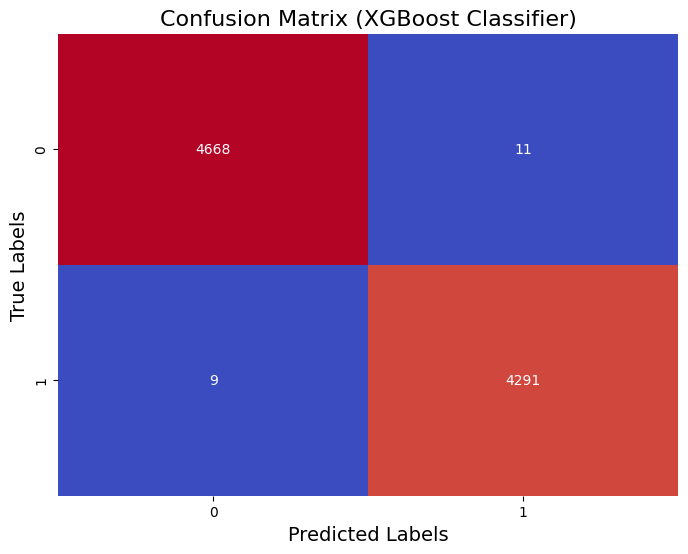

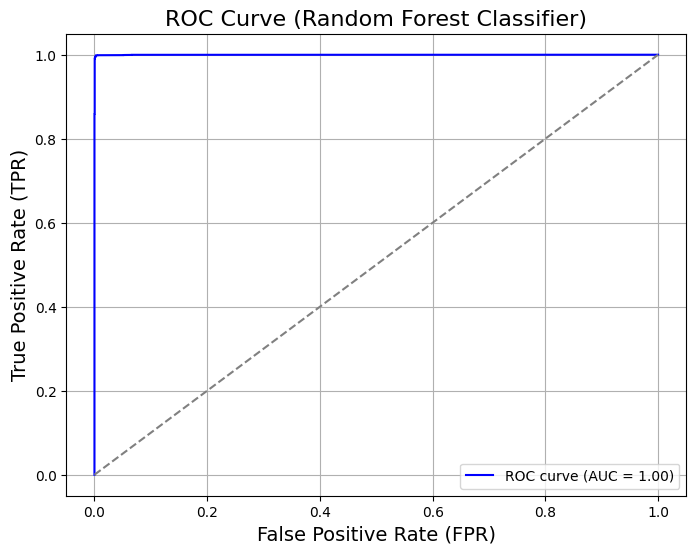

In [65]:
#Evaluate the model
# Training accuracy
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"XGBoost Training Accuracy: {train_accuracy:.2f}")
print(f"XGBoost Testing Accuracy: {test_accuracy:.2f}")

# Classification report for the test set
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 5: Visualize the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix (XGBoost Classifier)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

#ROC Curve
# Get probability predictions for the positive class
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.title('ROC Curve (Random Forest Classifier)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**Multinomial Naive Bayes**

In [66]:
from sklearn.naive_bayes import MultinomialNB

# 4. Naive Bayes Model Training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Multinomial Naive Bayes Training Accuracy: 0.94
Multinomial Naive Bayes Testing Accuracy: 0.93

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4679
           1       0.94      0.92      0.93      4300

    accuracy                           0.93      8979
   macro avg       0.93      0.93      0.93      8979
weighted avg       0.93      0.93      0.93      8979



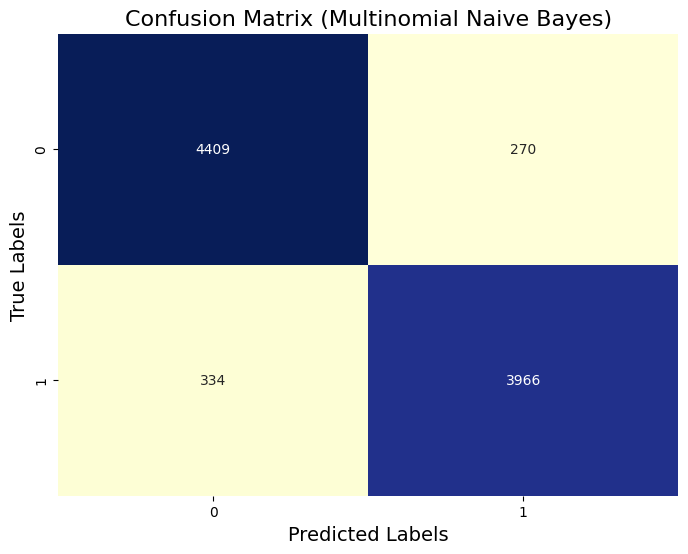

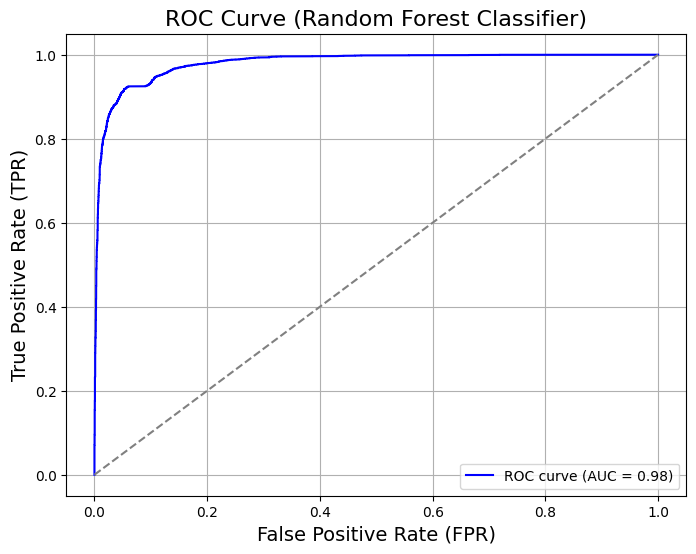

In [67]:
#Evaluate the model
# Training accuracy
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Multinomial Naive Bayes Training Accuracy: {train_accuracy:.2f}")
print(f"Multinomial Naive Bayes Testing Accuracy: {test_accuracy:.2f}")

# Classification report for the test set
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 5: Visualize the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix (Multinomial Naive Bayes)", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()

#ROC Curve
# Get probability predictions for the positive class
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.title('ROC Curve (Random Forest Classifier)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#5.2 **Evaluation Metrics**

In [68]:
# Placeholder for storing evaluation metrics
results = []

# Step 1: Define a function to evaluate each model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Test F1-Score': f1_score(y_test, y_test_pred, average='weighted'),
    }
    results.append(metrics)



In [69]:
# Evaluate models
# Multinomial Naive Bayes
evaluate_model(nb_model, "Multinomial NB", X_train, X_test, y_train, y_test)

# Logistic Regression
evaluate_model(lr_model, "Logistic Regression", X_train, X_test, y_train, y_test)

# Random Forest
evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test)

# SVM
evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test)

# XGBoost
evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test)

#Create a DataFrame with results
metrics_df = pd.DataFrame(results)

#Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

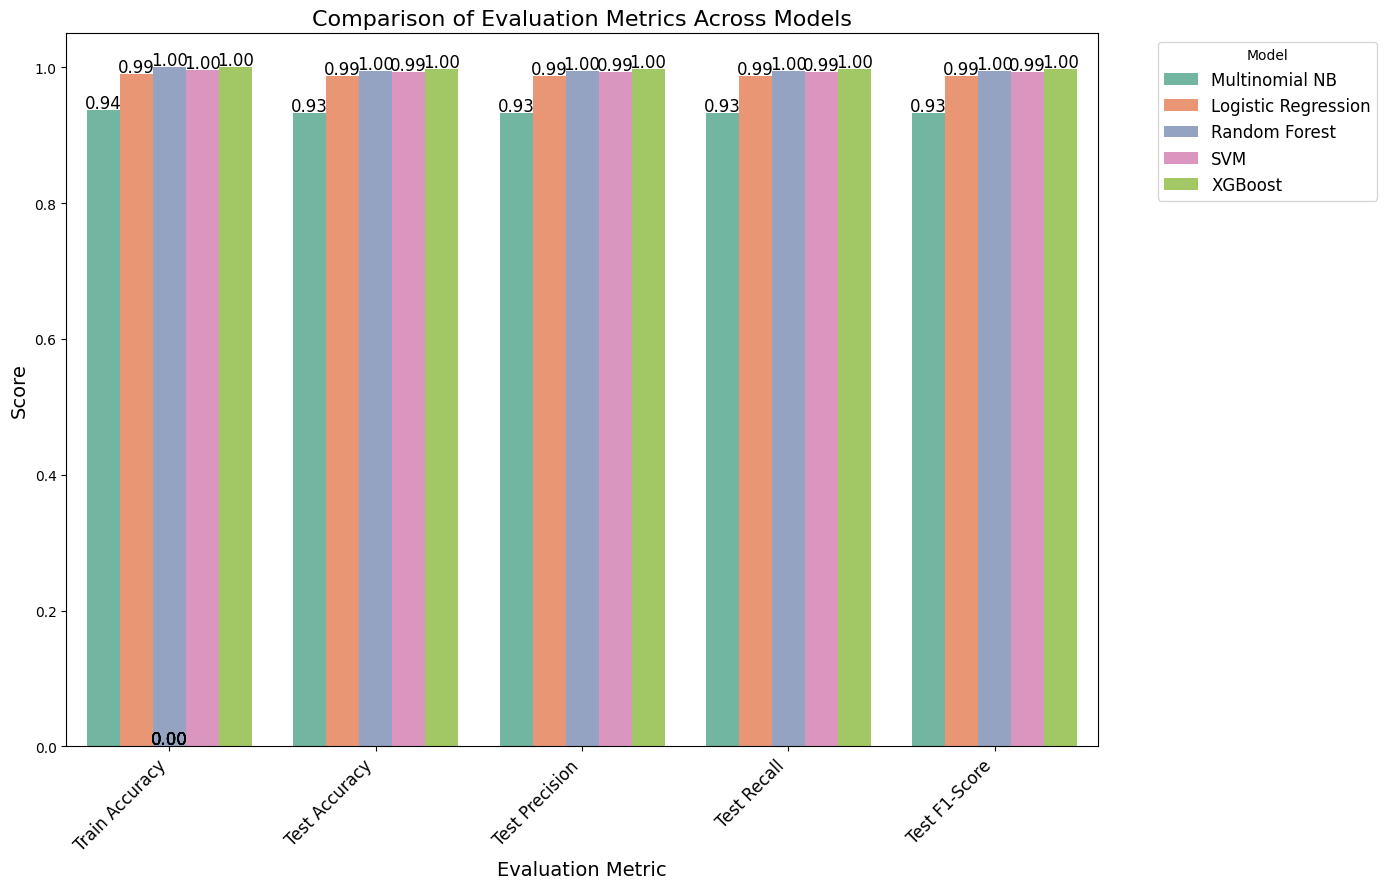

In [70]:
# Plot the comparison
plt.figure(figsize=(14, 9))

# Create the barplot
ax = sns.barplot(data=metrics_melted, x="Metric", y="Score", hue="Model", palette="Set2")

# Title and labels
plt.title("Comparison of Evaluation Metrics Across Models", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Evaluation Metric", fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Display value with 2 decimals
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')  # Offset the label slightly above the bar

# Adjust the legend position (move it outside)
plt.legend(title="Model", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Show the plot
plt.show()


####**Consistent Performance Across Models:**
- All models **(Multinomial NB, Logistic Regression, Random Forest, SVM, and XGBoost)** have similar scores across evaluation metrics.
- **Accuracy, precision, recall, and F1-score** are all close to **0.94–1.00** for each model.
- **Training accuracy is very high (close to 1)** for all models, indicating good fit on the training data.
- **Test accuracy** is nearly identical to training accuracy for all models, suggesting no significant overfitting.
- **Precision, recall, and F1-score** are balanced and similar across models, implying the models are making good predictions without favoring one class.

#**Step 6: Hyperparamter Tuning**

In [71]:
!pip install scipy

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.sparse as sp  # Import scipy.sparse

def hyperparameter_tuning(
    model, param_grid, X_train, y_train, X_test, y_test,
    search_type='grid', n_iter=10, sample_fraction=0.3, cv=3):
    """
    Perform faster hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

    Parameters:
    - model: The machine learning model.
    - param_grid: Dictionary of hyperparameters.
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - search_type: 'grid' for GridSearchCV or 'random' for RandomizedSearchCV.
    - n_iter: Number of iterations for RandomizedSearchCV (ignored for GridSearchCV).
    - sample_fraction: Fraction of the training data to use for tuning (0.0 < sample_fraction <= 1.0).
    - cv: Number of cross-validation folds.

    Returns:
    - best_model: The best estimator.
    - results: Dictionary of evaluation metrics.
    """
     # Sample a fraction of the training data for faster tuning
    if sample_fraction < 1.0:
        # Use sp.rand to get random indices for sampling the sparse matrix
        num_samples = int(sample_fraction * X_train.shape[0])
        sample_indices = sp.rand(X_train.shape[0], 1, density=sample_fraction, format='csr')
        sample_indices = sample_indices.nonzero()[0][:num_samples]

        X_train_sample = X_train[sample_indices]
        y_train_sample = y_train.iloc[sample_indices]  # Use .iloc to select rows by index
    else:
        X_train_sample, y_train_sample = X_train, y_train


    # Use GridSearchCV or RandomizedSearchCV
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    elif search_type == 'random':
        search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, cv=cv, scoring='accuracy',
                                    verbose=1, random_state=42, n_jobs=-1)
    else:
        raise ValueError("search_type must be 'grid' or 'random'.")

    # Perform search
    search.fit(X_train_sample, y_train_sample)

    # Best model and parameters
    best_model = search.best_estimator_
    print(f"Best Parameters for {type(model).__name__}: {search.best_params_}")

    # Evaluate on the full test data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Return results
    results = {
        'best_model': best_model,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    return best_model, results


In [73]:
# Define hyperparameter grids for all models
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

param_grid_nb = {
    'alpha': [0.1, 0.5, 1],
    'fit_prior': [True, False]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning for each model
best_lr, results_lr = hyperparameter_tuning(
    LogisticRegression(random_state=42), param_grid_lr,
    X_train, y_train, X_test, y_test,
    search_type='random', n_iter=5, sample_fraction=0.5, cv=3
)

best_svm, results_svm = hyperparameter_tuning(
    SVC(random_state=42), param_grid_svm,
    X_train, y_train, X_test, y_test,
    search_type='random', n_iter=5, sample_fraction=0.5, cv=3
)

best_xgb, results_xgb = hyperparameter_tuning(
    XGBClassifier(eval_metric='logloss', random_state=42), param_grid_xgb,
    X_train, y_train, X_test, y_test,
    search_type='random', n_iter=10, sample_fraction=0.5, cv=3
)

best_nb, results_nb = hyperparameter_tuning(
    MultinomialNB(), param_grid_nb,
    X_train, y_train, X_test, y_test,
    search_type='random', n_iter=5, sample_fraction=0.5, cv=3
)

best_rf, results_rf = hyperparameter_tuning(
    RandomForestClassifier(random_state=42), param_grid_rf,
    X_train, y_train, X_test, y_test,
    search_type='random', n_iter=10, sample_fraction=0.5, cv=3
)

# Print final results summary
print("\n--- Model Results Summary ---")
print("Logistic Regression Accuracy:", results_lr['accuracy'])
print("SVM Accuracy:", results_svm['accuracy'])
print("XGBoost Accuracy:", results_xgb['accuracy'])
print("Naive Bayes Accuracy:", results_nb['accuracy'])
print("Random Forest Accuracy:", results_rf['accuracy'])


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for LogisticRegression: {'solver': 'liblinear', 'max_iter': 1000, 'C': 10}

Accuracy: 0.9899

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4679
           1       0.99      0.99      0.99      4300

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99      8979
weighted avg       0.99      0.99      0.99      8979


Confusion Matrix:
 [[4640   39]
 [  52 4248]]
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters for SVC: {'kernel': 'linear', 'gamma': 0.1, 'C': 1}

Accuracy: 0.9912

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4679
           1       0.99      0.99      0.99      4300

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99

#**Step 7: Evaluation**

<ipython-input-74-8a682167b5cf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


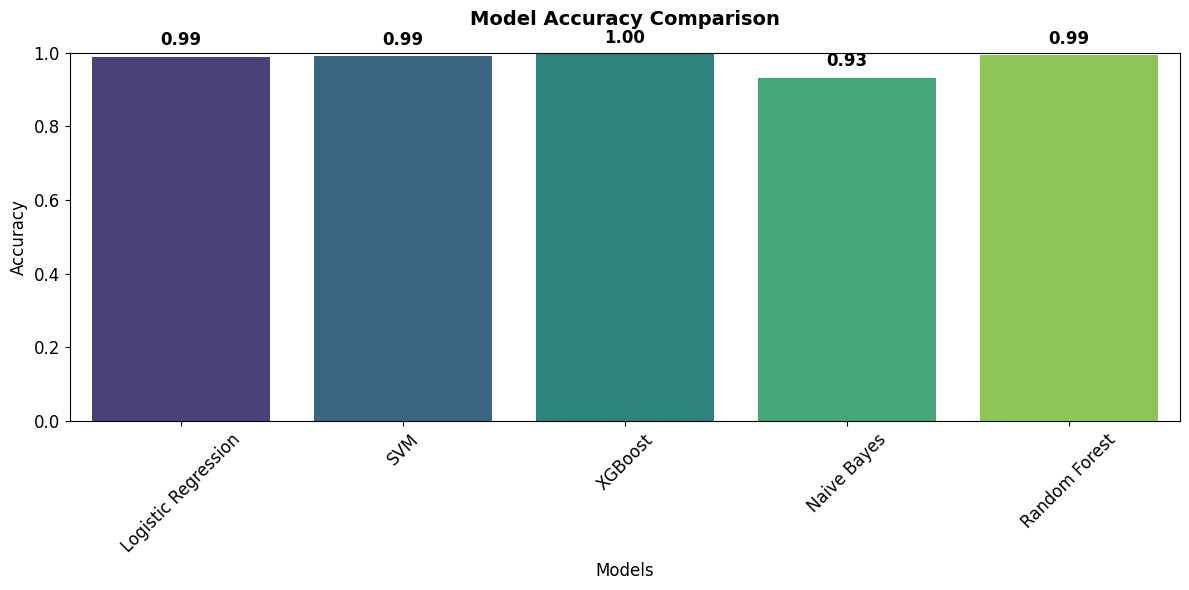

In [74]:
# Collect accuracies for all models
model_names = ['Logistic Regression', 'SVM', 'XGBoost', 'Naive Bayes', 'Random Forest']
accuracies = [
    results_lr['accuracy'],
    results_svm['accuracy'],
    results_xgb['accuracy'],
    results_nb['accuracy'],
    results_rf['accuracy']
]

# Plot the comparison
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold', pad=20)  # Increased fontsize and added padding for title
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels

# Show the values on the bars with a higher position to ensure visibility
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.03, f"{acc:.2f}", ha='center', fontsize=12, weight='bold', color='black')

plt.tight_layout()  # Automatically adjust subplot parameters to give some padding
plt.show()


- **XGBoost and Random Forest** stand out with perfect accuracy, suggesting these ensemble methods may be better suited to the dataset.
- **Naive Bayes** is the weakest performer, which might indicate its assumptions about feature independence don't align well with the data.
- The high performance of **Logistic Regression and SVM** indicates the dataset may have a well-separated decision boundary.

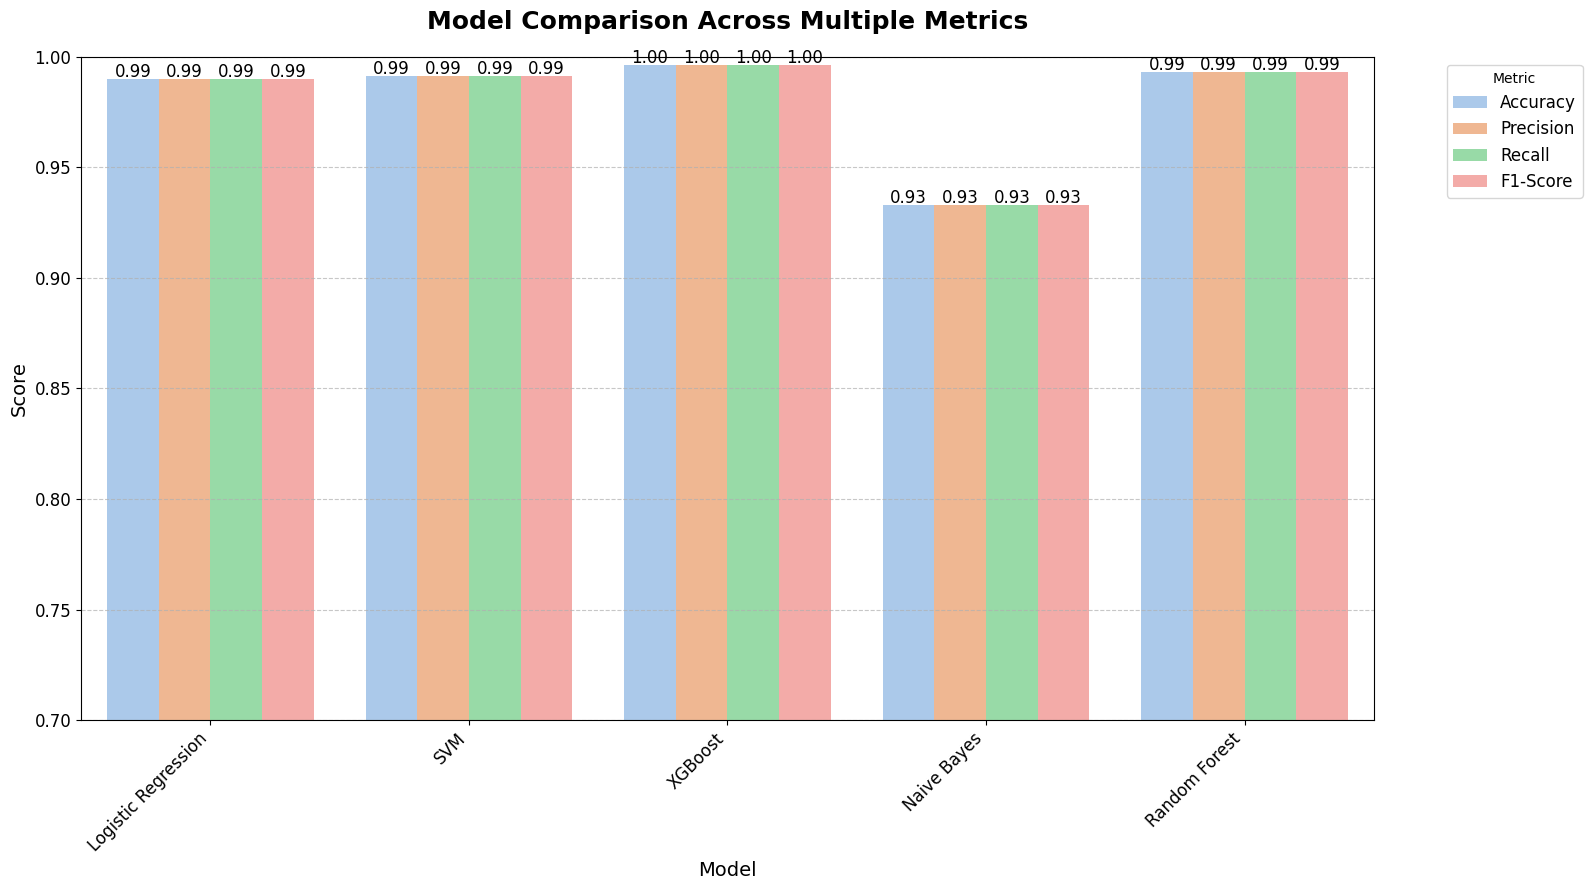

In [75]:
# Model names and corresponding accuracies (including Random Forest)
model_names = ['Logistic Regression', 'SVM', 'XGBoost', 'Naive Bayes', 'Random Forest']
accuracies = [
    results_lr['accuracy'],
    results_svm['accuracy'],
    results_xgb['accuracy'],
    results_nb['accuracy'],
    results_rf['accuracy']
]

# Prepare Extended Data with metrics for all models
extended_metrics = {
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': [
        results_lr['classification_report']['weighted avg']['precision'],
        results_svm['classification_report']['weighted avg']['precision'],
        results_xgb['classification_report']['weighted avg']['precision'],
        results_nb['classification_report']['weighted avg']['precision'],
        results_rf['classification_report']['weighted avg']['precision']
    ],
    'Recall': [
        results_lr['classification_report']['weighted avg']['recall'],
        results_svm['classification_report']['weighted avg']['recall'],
        results_xgb['classification_report']['weighted avg']['recall'],
        results_nb['classification_report']['weighted avg']['recall'],
        results_rf['classification_report']['weighted avg']['recall']
    ],
    'F1-Score': [
        results_lr['classification_report']['weighted avg']['f1-score'],
        results_svm['classification_report']['weighted avg']['f1-score'],
        results_xgb['classification_report']['weighted avg']['f1-score'],
        results_nb['classification_report']['weighted avg']['f1-score'],
        results_rf['classification_report']['weighted avg']['f1-score']
    ]
}

# Create DataFrame for extended metrics
comparison_df_ext = pd.DataFrame(extended_metrics)

# Melt the DataFrame for grouped bar chart
comparison_df_melted = comparison_df_ext.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot Grouped Bar Chart with improved aesthetics
plt.figure(figsize=(16, 9))  # Increase figure size for spaciousness
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted, palette='pastel')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Display value with 2 decimals
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')  # Offset the label slightly above the bar

# Customizations
plt.title('Model Comparison Across Multiple Metrics', fontsize=18, weight='bold', pad=20)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.7, 1.0)  # Adjust the range based on the score range
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better comparison

# Adjust the legend position (move it outside)
plt.legend(title="Metric", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Show the plot
plt.show()


- **XGBoost and Random Forest** stand out for their flawless performance, making them ideal for tasks where precision and recall are equally important.
- **Logistic Regression and SVM** also show excellent performance but are marginally behind the ensemble methods.
- **Naive Bayes**, while consistent, falls short of the high performance of the other models, likely due to the dataset's complexity or feature correlations.

#**Step 8:Deployement**

In [76]:
# Step 7: Save the model and vectorizer
import pickle
#Best Parameter
xgb_model2 = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.2,
    random_state=42  # Ensures reproducibility
)
# Fit the model on the training data
xgb_model2.fit(X_train, y_train)

# Save the model
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_model2,file)

# Save the vectorizer
vectorizer = tfidf

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)